<a href="https://colab.research.google.com/github/x-state7/Machine-Learn/blob/main/Chapter_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
X=2*np.random.rand(100,1)

y=4+3*X+np.random.randn(100,1)

In [ ]:
#np.ones((100,1)):This part creates a column vector of ones with a shape of (100, 1).The function
#np.ones() from NumPy generates an array filled with ones, and (100, 1)
#np.c_[...]:concatenates arrays along the second axis
X_b=np.c_[np.ones((100,1)),X]

# θbest​=(XbT​⋅Xb​)^−1⋅XbT​⋅y
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [ ]:
theta_best

array([[4.20533231],
       [2.94509466]])

In [ ]:
X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)),X_new]
y_predict=X_new_b.dot(theta_best)
y_predict

array([[ 4.20533231],
       [10.09552164]])

<function matplotlib.pyplot.show(close=None, block=None)>

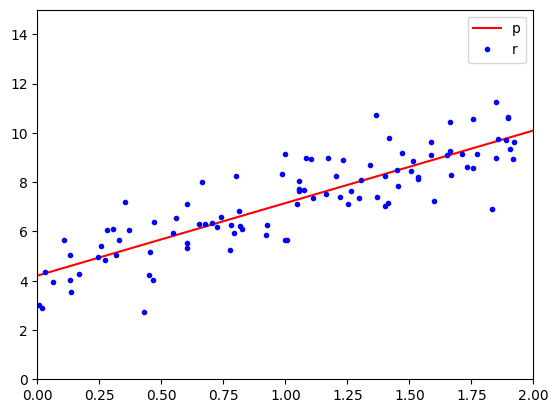

In [ ]:
import matplotlib.pyplot as plt
# be red (r) and solid (-).
# This represents the regression line predicted by the model for the new data points.
plt.plot(X_new,y_predict,"r-")

# blue (b) and represented as dots (.)
plt.plot(X,y,"b.")
plt.legend("predictions")
plt.axis([0,2,0,15])
plt.show

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)

# intercept_ attribute represents the intercept term (bias),
# and the coef_ attribute represents the coefficients for the input features.
lin_reg.intercept_,lin_reg.coef_

(array([4.20533231]), array([[2.94509466]]))

LinearRegression class is based on the scipy.linalg.lstsq() function (the
name stands for “least squares”), which you could call directly:

rcond=1e-6: This parameter sets the threshold for singular values to determine the effective rank of X_b. Singular values smaller than rcond * max(s) are considered zero. This helps handle singular or nearly singular matrices.


**np.linalg.lstsq(...):** This function computes the least-squares solution to a linear matrix equation

**theta_best_svd: **This variable holds the solution to the linear regression problem, i.e., the optimal parameters (coefficients) of the linear model.

**residuals: **This variable holds the sum of squared residuals of the least-squares fit.

**rank: **This variable holds the rank of the augmented feature matrix X_b.

**s:** This variable holds the singular values of X_b.

In [ ]:
theta_best_svd,residualas,rank,s=np.linalg.lstsq(X_b,y,rcond=1e-6)
theta_best_svd

array([[4.20533231],
       [2.94509466]])

In [ ]:
lin_reg.predict(X_new)

array([[ 4.20533231],
       [10.09552164]])

computes θ = X+y, where X^+ is the pseudoinverse of X (specifically the
Moore-Penrose inverse). You can use np.linalg.pinv() to compute the pseudoin‐
verse directly:

In [ ]:
np.linalg.pinv(X_b).dot(y)

array([[4.20533231],
       [2.94509466]])

Now we will look at very different ways to train a Linear Regression model, better
suited for cases where there are a large number of features, or too many training
instances to fit in memory.

#                    **Gradient Descent**

### **Batch Gradient Descent**


Equation 4-6. Gradient vector of cost function
∇θ MSE θ = 2/m X^T (Xθ - y)

Equation 4-7. Gradient Descent step
θ next step = θ - η ∇θ MSE (θ)

In [ ]:
eta=0.1
n_iterations=1000
m=100
theta=np.random.randn(2,1) #random initialization
for iteration in range(n_iterations):
  gradients=2/m*X_b.T.dot(X_b.dot(theta)-y)
  theta=theta-eta*gradients

In [ ]:
theta

array([[4.20533231],
       [2.94509466]])

### **Stochastic Gradient Descent**

When the cost function is very irregular this can actually help the
algorithm jump out of local minima, so Stochastic Gradient Descent has a better
chance of finding the global minimum than Batch Gradient Descent does.
Therefore randomness is good to escape from local optima, but bad because it means
that the algorithm can never settle at the minimum. One solution to this dilemma is
to gradually reduce the learning rate

In [ ]:
n_epochs=50
t0,t1=5,50 #learning schedule hyperparameters
def learning_schedule(t):
  return t0/(t+t1)

theta=np.random.randn(2,1)#random initialiszation
for epoch in range(n_epochs):
    for i in range(m):
      random_index=np.random.randint(m)
      xi=X_b[random_index:random_index+1]
      yi=y[random_index:random_index+1]
      gradients=2*xi.T.dot(xi.dot(theta)-yi)
      eta=learning_schedule(epoch*m+i)
      theta=theta-eta*gradients

In [ ]:
theta

array([[4.25820872],
       [2.97439057]])

perform Linear Regression using SGD with Scikit-Learn, you can use the SGDRe
gressor class, which defaults to optimizing the squared error cost function. The fol‐
lowing code runs for maximum 1000 epochs (max_iter=1000) or until the loss drops
by less than 1e-3 during one epoch (tol=1e-3), starting with a learning rate of 0.1



In [ ]:
# max_iter=1000: Maximum number of iterations (epochs) the model will be trained for.
# tol=1e-3: Tolerance to declare convergence. If the improvement is less than this value, the optimization process is stopped.
# penalty=None: No regularization penalty is applied
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.16755217]), array([2.97584066]))

### **Mini-batch Gradient Descent**

The algorithm’s progress in parameter space is less erratic than with SGD, especially
with fairly large mini-batches. As a result, Mini-batch GD will end up walking
around a bit closer to the minimum than SGD. But, on the other hand, it may be
harder for it to escape from local minima (in the case of problems that suffer from
local minima, unlike Linear Regression as we saw earlier). Figure 4-11 shows the
paths taken by the three Gradient Descent algorithms in parameter space during
training. They all end up near the minimum, but Batch GD’s path actually stops at the
minimum, while both Stochastic GD and Mini-batch GD continue to walk around.
However, don’t forget that Batch GD takes a lot of time to take each step, and Stochas‐
tic GD and Mini-batch GD would also reach the minimum if you used a good learn‐
ing schedule.


### **Polynomial egression**

if your data is actually more complex than a simple straight line? Surprisingly,
you can actually use a linear model to fit nonlinear data. A simple way to do this is to
add powers of each feature as new features, then train a linear model on this extended
set of features. This technique is called Polynomial Regression.

In [ ]:
# m is the number of training instances and n is the number of features
m=100
X=6*np.random.rand(m,1)-3
y=0.5*X**2+X+2+np.random.randn(m,1)

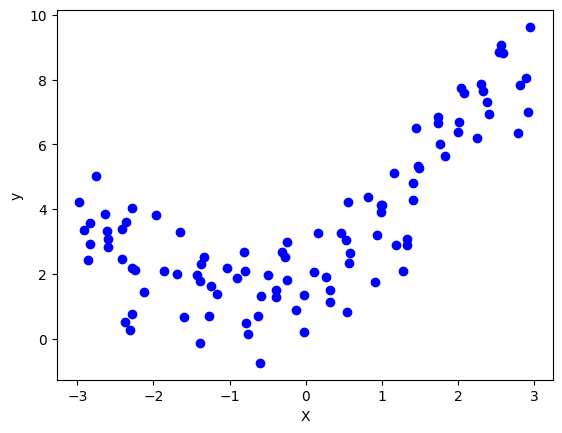

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X,y,color="blue",label="Data points")
plt.xlabel('X')
plt.ylabel('y')
plt.show()

Clearly, a straight line will never fit this data properly. So let’s use Scikit-Learn’s Poly
nomialFeatures class to transform our training data, adding the square (2nd-degree
polynomial) of each feature in the training set as new features (in this case there is
just one feature):

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly_features.fit_transform(X)
X[0]

array([1.76125419])

In [ ]:
X_poly[0]

array([1.76125419, 3.10201632])

X_poly now contains the original feature of X plus the square of this feature. Now you
can fit a LinearRegression model to this extended training data

In [ ]:
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([1.99909319]), array([[1.00087855, 0.51782156]]))

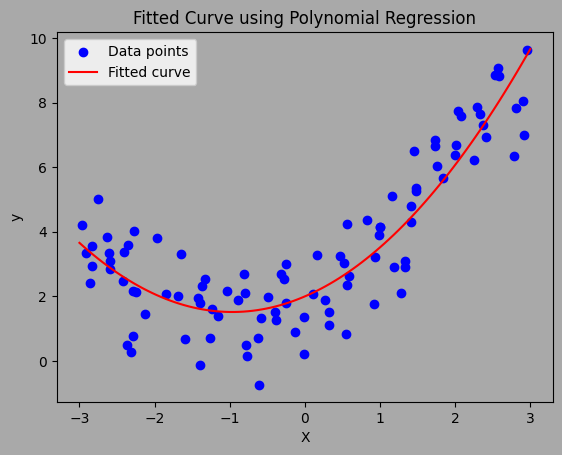

In [ ]:

# Plot original data points
plt.figure(facecolor='darkgrey')  # Set the background color of the figure
plt.scatter(X, y, color='blue', label='Data points')
X_new = np.linspace(-3, 3, 100).reshape(-1, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X_new, y_new, color='red', label='Fitted curve')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Fitted Curve using Polynomial Regression')
plt.legend()
plt.gca().set_facecolor('darkgrey')

plt.show()

LEARNING CURVES

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
  X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2)
  train_errors,val_errors=[],[]#Empty lists are initialized to store training and validation errors.

  for m in range(1,len(X_train)):
#The model is trained on a subset of the training data (increasing in size with each iteration)
#and predictions are made both on this subset and on the entire validation set.
    model.fit(X_train[:m],y_train[:m])
    y_train_predict=model.predict(X_train[:m])
    y_val_predict=model.predict(X_val)

# mean squared error is calculated between the true target values and the
# predicted values for both the training subset and the entire validation set
    train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
    val_errors.append(mean_squared_error(y_val,y_val_predict))

  plt.figure(facecolor='darkgrey')
  plt.plot(np.sqrt(train_errors),"r-+",linewidth=2,label="train")
  plt.plot(np.sqrt(val_errors),"b-",linewidth=3,label="val")
  plt.legend()
  plt.gca().set_facecolor('darkgrey')


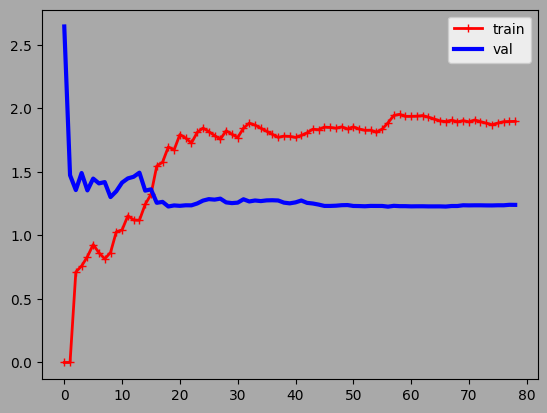

In [ ]:
lin_reg=LinearRegression()
plot_learning_curves(lin_reg,X,y)

###**Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=1,solver="cholesky")
ridge_reg.fit(X,y)

Ridge(alpha=1, solver='cholesky')

In [ ]:
ridge_reg.predict([[1.5]])

array([[4.97449599]])

In [ ]:
from sklearn.linear_model import SGDRegressor
sdg_reg=SGDRegressor(penalty="12")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([4.93176234])

####**LASSO FUNCTION**

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.92824242])

So when should you use plain Linear Regression (i.e., without any regularization),
Ridge, Lasso, or Elastic Net? It is almost always preferable to have at least a little bit of
regularization, so generally you should avoid plain Linear Regression. Ridge is a good
default, but if you suspect that only a few features are actually useful, you should pre‐
fer Lasso or Elastic Net since they tend to reduce the useless features’ weights down to
zero as we have discussed. In general, Elastic Net is preferred over Lasso since Lasso
may behave erratically when the number of features is greater than the number of
training instances or when several features are strongly correlated

####Elastic NET

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net=ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.93093162])